In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('aurangabad_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,RH,WS,WD,SR,RF,TOT-RF,date,day,month,year
0,Aurangabad,37.10,123.47,18.77,17.25,7.04,20.81,5.38,1.19,65.32,...,23.80,1.14,200.78,712.83,0.0,0.0,2019-01-01,1,1,2019
1,Aurangabad,67.45,160.01,79.74,16.15,47.45,31.91,4.64,1.40,67.58,...,26.41,1.40,186.57,652.32,0.0,0.0,2019-02-01,2,1,2019
2,Aurangabad,30.56,133.68,15.85,17.76,4.93,20.13,8.40,0.78,84.89,...,27.75,1.35,187.25,662.91,0.0,0.0,2019-03-01,3,1,2019
3,Aurangabad,45.86,126.96,16.02,17.41,7.22,20.28,7.63,1.25,73.10,...,30.61,1.48,178.47,673.39,0.0,0.0,2019-04-01,4,1,2019
4,Aurangabad,36.93,142.26,16.11,17.57,5.22,20.30,6.89,0.91,81.48,...,35.48,1.74,149.55,659.10,0.0,0.0,2019-05-01,5,1,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City']
dt = data.drop(cols_to_drop,axis=1)
# print out the info of the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2_5        1551 non-null   float64       
 1   PM10         1551 non-null   float64       
 2   NO           1551 non-null   float64       
 3   NO2          1551 non-null   float64       
 4   NOx          1551 non-null   float64       
 5   NH3          1551 non-null   float64       
 6   SO2          1551 non-null   float64       
 7   CO           1551 non-null   float64       
 8   Ozone        1551 non-null   float64       
 9   Benzene      1551 non-null   float64       
 10  Toluene      1551 non-null   float64       
 11  Eth-Benzene  1551 non-null   float64       
 12  MP-Xylene    1551 non-null   float64       
 13  O            1551 non-null   float64       
 14  RH           1551 non-null   float64       
 15  WS           1551 non-null   float64       
 16  WD    

In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(dt.duplicated().any()))
print('The total number of null values in each colum:')
display(dt.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
Toluene        0
Eth-Benzene    0
MP-Xylene      0
O              0
RH             0
WS             0
WD             0
SR             0
RF             0
TOT-RF         0
date           0
day            0
month          0
year           0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
dt.fillna(value=dt.mean(),inplace=True)
# let's check the data again if there are any missing values
dt.isnull().any()

PM2_5          False
PM10           False
NO             False
NO2            False
NOx            False
NH3            False
SO2            False
CO             False
Ozone          False
Benzene        False
Toluene        False
Eth-Benzene    False
MP-Xylene      False
O              False
RH             False
WS             False
WD             False
SR             False
RF             False
TOT-RF         False
date           False
day            False
month          False
year           False
dtype: bool

In [6]:
dt.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,RH,WS,WD,SR,RF,TOT-RF,date,day,month,year
0,37.10,123.47,18.77,17.25,7.04,20.81,5.38,1.19,65.32,0.21,...,23.80,1.14,200.78,712.83,0.0,0.0,2019-01-01,1,1,2019
1,67.45,160.01,79.74,16.15,47.45,31.91,4.64,1.40,67.58,0.26,...,26.41,1.40,186.57,652.32,0.0,0.0,2019-02-01,2,1,2019
2,30.56,133.68,15.85,17.76,4.93,20.13,8.40,0.78,84.89,0.21,...,27.75,1.35,187.25,662.91,0.0,0.0,2019-03-01,3,1,2019
3,45.86,126.96,16.02,17.41,7.22,20.28,7.63,1.25,73.10,0.20,...,30.61,1.48,178.47,673.39,0.0,0.0,2019-04-01,4,1,2019
4,36.93,142.26,16.11,17.57,5.22,20.30,6.89,0.91,81.48,0.26,...,35.48,1.74,149.55,659.10,0.0,0.0,2019-05-01,5,1,2019


In [7]:
def remove_outliers(df, n_std, dataset):
    """
    Removes outliers from a dataset using the z-score method.
    
    Parameters:
        data (array-like): The input dataset.
        n_std (float): The number of standard deviations from the mean to use as the threshold for identifying outliers.
    
    Returns:
        The input dataset with outliers removed.
    """
    z_scores = np.abs((df - np.mean(df)) / np.std(df))
    filtered_data = dataset[z_scores < n_std]
    return filtered_data

In [8]:
df = dt['PM10']
dataset = dt
data = remove_outliers(df, 3, dt)
print(data)

      PM2_5    PM10     NO    NO2    NOx    NH3    SO2    CO  Ozone  Benzene  \
0     37.10  123.47  18.77  17.25   7.04  20.81   5.38  1.19  65.32     0.21   
1     67.45  160.01  79.74  16.15  47.45  31.91   4.64  1.40  67.58     0.26   
2     30.56  133.68  15.85  17.76   4.93  20.13   8.40  0.78  84.89     0.21   
3     45.86  126.96  16.02  17.41   7.22  20.28   7.63  1.25  73.10     0.20   
4     36.93  142.26  16.11  17.57   5.22  20.30   6.89  0.91  81.48     0.26   
...     ...     ...    ...    ...    ...    ...    ...   ...    ...      ...   
1545  28.72   97.98   7.96  28.70   9.90  26.51   9.07  0.89  32.75     8.69   
1546  38.36  111.66   8.23  29.48  10.53  26.47   8.09  1.05  32.76    11.95   
1547  46.48  136.57   9.28  29.19  11.22  26.40  10.02  1.15  31.79    15.13   
1549  38.99  109.57   8.24  28.58  10.06  26.92   7.74  0.92  31.06     7.62   
1550  47.72  110.69   9.04  29.88  11.38  26.46   7.33  1.28  36.08     7.10   

      ...     RH    WS      WD         

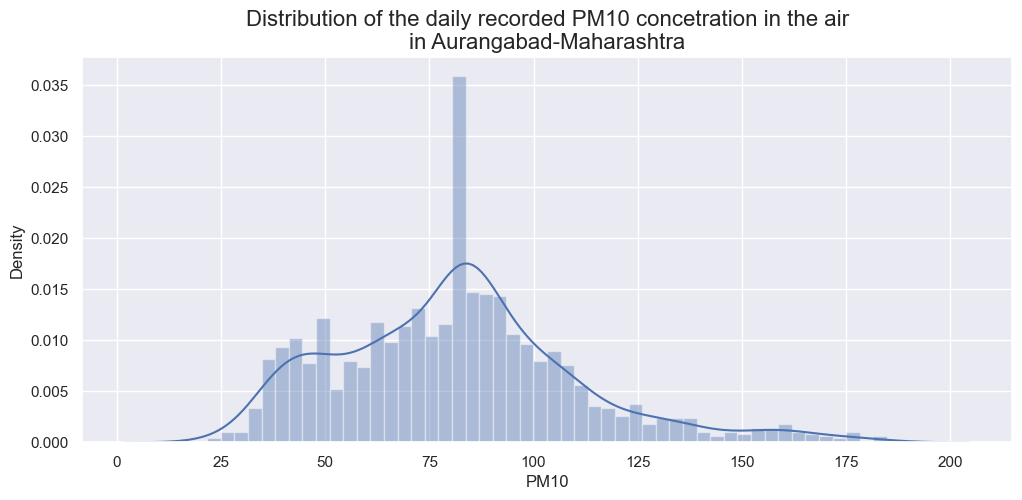

In [9]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM10'],bins=50)
plt.title('Distribution of the daily recorded PM10 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [10]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM10']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM10'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM10']

# display the resulting DataFrame
print(monthly_average)

       median_PM10
month             
1             98.4
2             85.8
3             85.2
4             85.3
5             76.6
6             73.0
7             70.4
8             56.0
9             60.2
10            74.8
11            84.8
12            94.4


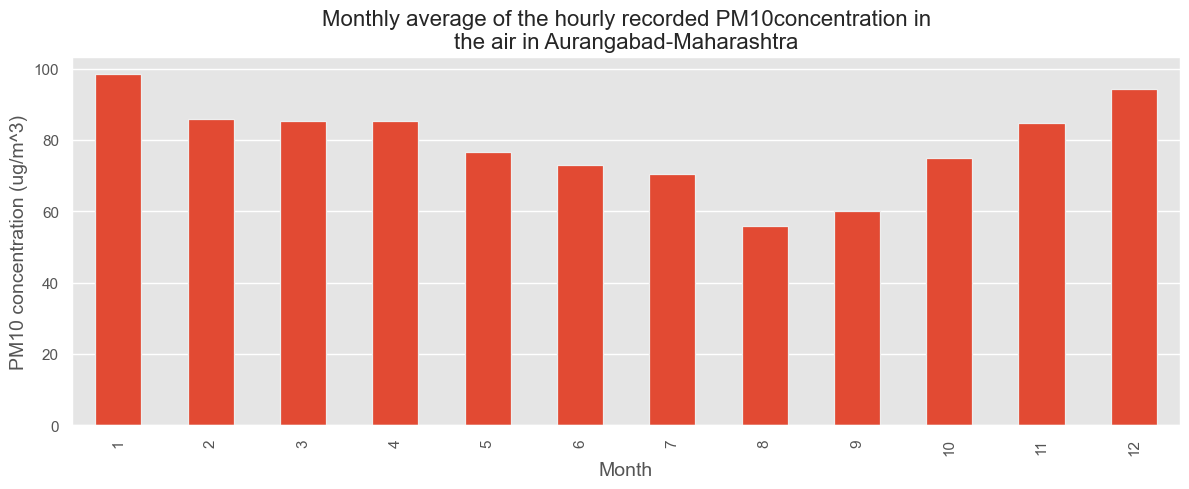

In [11]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM10 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM10concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

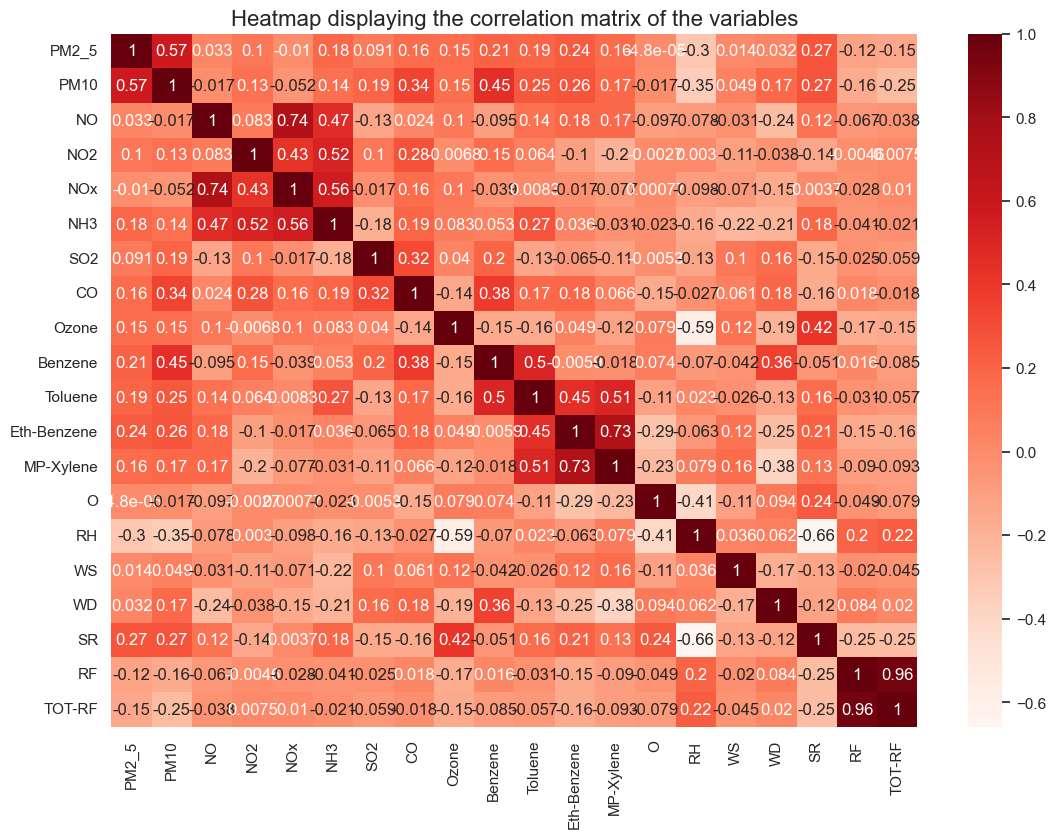

In [12]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene', 'Toluene','Eth-Benzene','MP-Xylene','O','RH','WS','WD','SR','RF','TOT-RF']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [13]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const          311.841456
PM2_5            1.575061
PM10             2.330992
NO               3.149390
NO2              2.033490
NOx              3.662492
NH3              2.706320
SO2              1.383582
CO               1.714058
Ozone            1.937250
Benzene          2.858702
Toluene          2.969645
Eth-Benzene      2.743968
MP-Xylene        3.240099
O                1.547856
RH               3.322478
WS               1.246502
WD               1.776976
SR               2.519501
RF              15.253117
TOT-RF          15.747641
dtype: float64

In [14]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,O,RH,WS,WD,SR,RF,TOT-RF
0,37.10,123.47,18.77,17.25,7.04,20.81,5.38,1.19,65.32,0.21,0.00,10.45,0.62,22.11,23.80,1.14,200.78,712.83,0.0,0.0
1,67.45,160.01,79.74,16.15,47.45,31.91,4.64,1.40,67.58,0.26,0.00,13.15,0.90,22.72,26.41,1.40,186.57,652.32,0.0,0.0
2,30.56,133.68,15.85,17.76,4.93,20.13,8.40,0.78,84.89,0.21,0.00,7.83,0.44,23.36,27.75,1.35,187.25,662.91,0.0,0.0
3,45.86,126.96,16.02,17.41,7.22,20.28,7.63,1.25,73.10,0.20,0.00,13.26,0.65,23.42,30.61,1.48,178.47,673.39,0.0,0.0
4,36.93,142.26,16.11,17.57,5.22,20.30,6.89,0.91,81.48,0.26,11.67,8.76,0.40,23.27,35.48,1.74,149.55,659.10,0.0,0.0


In [15]:
#

In [16]:
columns_to_drop = ['RH','WS','WD','SR','RF','TOT-RF']

newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const          101.536321
PM2_5            1.549435
PM10             2.085514
NO               3.136438
NO2              1.903574
NOx              3.619027
NH3              2.436112
SO2              1.319620
CO               1.617661
Ozone            1.241694
Benzene          2.483965
Toluene          2.799187
Eth-Benzene      2.650525
MP-Xylene        2.844418
O                1.148428
dtype: float64

In [17]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','O','Benzene','Toluene','Eth_Benzene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM10'] = np.log(newdata['PM10'])

In [18]:
mul_reg = formula.ols(formula="PM10 ~ PM2_5  + NO + NO2 + NOx + NH3 + SO2 + CO + Ozone + O + Benzene + Toluene + Eth_Benzene + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     122.4
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          1.53e-225
Time:                        10:21:33   Log-Likelihood:                -96.089
No. Observations:                1537   AIC:                             220.2
Df Residuals:                    1523   BIC:                             294.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.4989      0.066     52.798      0.000       3.369       3.629
PM2_5           0.0078      0.000     20.402      0.000       0.007       0.009
NO              0.0011      0.001      1.460      0.145      -0.000       0.003
NO2             0.0027      0.001      3.139      0.002       0.001       0.004
NOx            -0.0046      0.001     -4.247      0.000      -0.007      -0.003
NH3             0.0019      0.001      1.299      0.194      -0.001       0.005
SO2             0.0032      0.001      3.223      0.001       0.001       0.005
CO              0.0846      0.027      3.083      0.002       0.031       0.138
Ozone           0.0026      0.000      7.308      0.000       0.002       0.003
O               0.0397      0.003     14.343      0.000       0.034       0.045
Benzene        -0.0034      0.001     -5.467      0.000      -0.005      -0.002
Toluene         0.0217      0.003      6.243      0.000       0.015       0.029
Eth_Benzene     0.0085      0.002      4.758      0.000       0.005       0.012
MP_Xylene       0.0024      0.002      1.240      0.215      -0.001       0.006
==============================================================================
Omnibus:                      552.714   Durbin-Watson:                   0.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5375.343
Skew:                          -1.393   Prob(JB):                         0.00
Kurtosis:                      11.728   Cond. No.                         726.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM10',axis=1)
y = newdata['PM10']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM2_5,NO,NO2,NOx,NH3,SO2,CO,Ozone,O,Benzene,Toluene,Eth_Benzene,MP_Xylene
0,-0.045713,0.727620,-0.187647,-0.208879,1.281688,-0.890418,1.321046,1.415055,-0.896660,-0.846578,2.041908,-0.921763,-2.036681
1,1.532755,4.823460,-0.293232,3.348280,2.853253,-0.987037,2.013022,1.527820,-0.882288,-0.846578,2.922353,-0.876641,-1.870604
2,-0.385850,0.531460,-0.138694,-0.394616,1.185411,-0.496110,-0.029954,2.391520,-0.896660,-0.846578,1.187550,-0.950770,-1.696361
3,0.409884,0.542880,-0.172289,-0.193035,1.206649,-0.596645,1.518753,1.803246,-0.899534,-0.846578,2.958223,-0.916929,-1.680025
4,-0.054554,0.548926,-0.156931,-0.369088,1.209480,-0.693264,0.398412,2.221374,-0.882288,-0.185462,1.490815,-0.957216,-1.720864


In [20]:
y.head()

0    4.815998
1    5.075236
2    4.895449
3    4.843872
4    4.957656
Name: PM10, dtype: float64

In [21]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [22]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.5005986842618824

Score on test data: 0.5220947318589593


In [23]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.06772775245726775

Overall model accuracy: 0.5220947318589593


In [24]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM10',axis=1)
y = ensemble_data['PM10']

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [26]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [27]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.7655884041582905

Score on test data: 0.5810147325596814

Root Mean Squared Error: 17.128215995979545

Overall model accuracy: 0.5810147325596814


In [28]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [29]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.6937601266556126

Score on test data: 0.42652979609697284

Best parameters found:


{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 9}

Root Mean Squared Error: 20.03863726315471

Overall model accuracy: 0.42652979609697284


In [30]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree_10.xlsx')

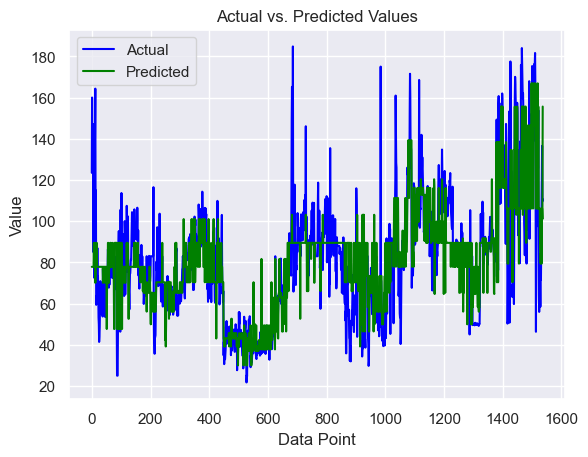

In [31]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, dtpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

In [32]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [33]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8848873299780882

Score on test data: 0.7025332947562681

Root Mean Squared Error: 14.432179987476713

Overall model accuracy: 0.7025332947562681


In [34]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [35]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.8544332947802167

Score on test data: 0.698488236839929

Best parameters found:


{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 6}

Root Mean Squared Error: 14.529975600079219

Overall model accuracy: 0.698488236839929


In [36]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest_10.xlsx')

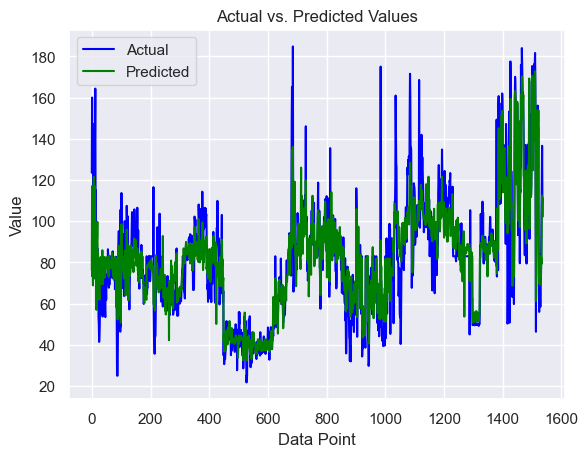

In [37]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, rfpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

In [38]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [39]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9950420460656881

Score on test data: 0.7468520243360659

Root Mean Squared Error: 13.313737325234465

Overall model accuracy: 0.7468520243360659


In [40]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [41]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.9998874094146576

Score on test data: 0.7200143294616459

Best parameters found:


{'n_estimators': 300,
 'min_samples_split': 7,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 7,
 'learning_rate': 0.2}

Root Mean Squared Error: 14.0016964248261

Overall model accuracy: 0.7200143294616459


In [42]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost_10.xlsx')

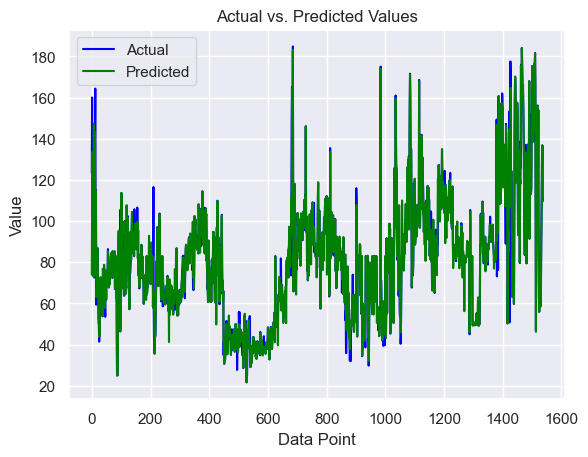

In [43]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, xgpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()
    

In [44]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1537 1537


In [45]:
"""
# we now use the best model (GradientBoostingRegressor model) to predict the PM2.5 
# concetration and compare it to the actual PM2.5 recorded in the data by means of
# visualization

compare_data = pd.DataFrame({'dates':data['date'],
                            'Actual PM2.5':y,
                            'Predicted PM2.5':gboost_search.predict(X.values)})

compare_data.set_index('dates',inplace=True)
compare_data['Predicted PM2.5'] = np.round(compare_data['Predicted PM2.5'],1)

# let's plot the daily averages of the Actual PM10 and the predicted PM2.5 concentration.
compare_data = compare_data.resample('D').mean()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,5))
    plt.scatter(compare_data.index,compare_data['Actual PM2.5'],s=15,label='Actual PM2.5',
               alpha=.6)
    plt.scatter(compare_data.index,compare_data['Predicted PM2.5'],s=15,label='Predicted PM2.5',
               alpha=.6)
    plt.legend()
    plt.title('Evaluating the GradientBoostingRegressor model\n(model accuracy = 93%)',
             fontsize=18)
    plt.xlabel('period',fontsize=15)
    plt.ylabel('PM2.5 concentration',fontsize=15)
    plt.show()


"""

"\n# we now use the best model (GradientBoostingRegressor model) to predict the PM2.5 \n# concetration and compare it to the actual PM2.5 recorded in the data by means of\n# visualization\n\ncompare_data = pd.DataFrame({'dates':data['date'],\n                            'Actual PM2.5':y,\n                            'Predicted PM2.5':gboost_search.predict(X.values)})\n\ncompare_data.set_index('dates',inplace=True)\ncompare_data['Predicted PM2.5'] = np.round(compare_data['Predicted PM2.5'],1)\n\n# let's plot the daily averages of the Actual PM10 and the predicted PM2.5 concentration.\ncompare_data = compare_data.resample('D').mean()\n\nwith plt.style.context('fivethirtyeight'):\n    plt.figure(figsize=(12,5))\n    plt.scatter(compare_data.index,compare_data['Actual PM2.5'],s=15,label='Actual PM2.5',\n               alpha=.6)\n    plt.scatter(compare_data.index,compare_data['Predicted PM2.5'],s=15,label='Predicted PM2.5',\n               alpha=.6)\n    plt.legend()\n    plt.title('Evalua